In [1]:
import os
os.chdir('/engram/nklab/hossein/recurrent_models/transformer_brain_encoder/')
!pwd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
import matplotlib.pyplot as plt

import numpy as np
import torch
# import torchvision.transforms as T
from PIL import Image
import torchvision.transforms as transforms
from datasets.nsd_utils import roi_maps, plot_on_brain
from datasets.nsd import fetch_dataloaders

from brain_encoder_wrapper import brain_encoder_wrapper


/engram/nklab/hossein/recurrent_models/transformer_brain_encoder


In [2]:
#qargs = ['dinov2_q_transformer', 'dinov2_q_last', 'rois_all', 1, 0]
subj=1
readout_res= 'voxels'
enc_output_layer=[1]
runs=[1]

model = brain_encoder_wrapper(subj=subj, readout_res=readout_res, enc_output_layer=enc_output_layer, runs=runs)

#print all roi names
print(list(model.lh_roi_names))

Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


['V1v', 'V1d', 'V2v', 'V2d', 'V3v', 'V3d', 'hV4', 'EBA', 'FBA-1', 'FBA-2', 'mTL-bodies', 'OFA', 'FFA-1', 'FFA-2', 'mTL-faces', 'aTL-faces', 'OPA', 'PPA', 'RSC', 'OWFA', 'VWFA-1', 'VWFA-2', 'mfs-words', 'mTL-words']


torch.Size([3, 425, 425])
torch.Size([3, 434, 434])


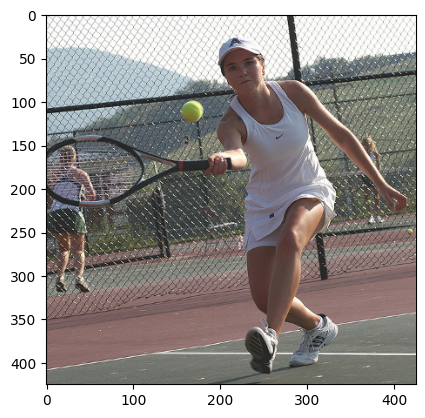

In [3]:

preprocess = transforms.Compose([
             transforms.ToTensor(),
             transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

train_img_dir  = os.path.join(model.data_dir, 'training_split', 'training_images')
image_path = train_img_dir + '/train-9039_nsd-66847.png'
image = Image.open(image_path)
plt.imshow(image)
img = preprocess(image)
print(img.shape)
patch_size = 14

size_im = (
    img.shape[0],
    int(np.ceil(img.shape[1] / patch_size) * patch_size),
    int(np.ceil(img.shape[2] / patch_size) * patch_size),
)
paded = torch.zeros(size_im)
paded[:, : img.shape[1], : img.shape[2]] = img
img = paded
print(paded.shape)
imgs = img[None, :,:,:]

h = img.shape[-2] // patch_size
w = img.shape[-1] // patch_size

# train_loader, val_loader = fetch_nsd_dataloader(args, args.batch_size, train='train')
# test_loader = fetch_nsd_dataloader(args, args.batch_size, train='test')

In [4]:
outputs = model.forward(imgs)

print(outputs)
#del outputs

# model.model.zero_grad()
# torch.cuda.empty_cache()
# 
#rois_acts = np.sum(outputs[0] * lh_challenge_rois) + np.sum(outputs[1] * rh_challenge_rois)

(tensor([[-0.1006, -0.0596, -0.7627,  ..., -0.4875, -0.4316, -0.2367]],
       device='cuda:0', grad_fn=<DiagonalBackward0>), tensor([[-0.2493, -0.1484,  1.1023,  ..., -0.0849, -0.0093, -0.2478]],
       device='cuda:0', grad_fn=<DiagonalBackward0>))


In [5]:
#qargs = ['dinov2_q_transformer', 'dinov2_q_last', 'rois_all', 1, 0]
subj=1
readout_res= 'rois_all'
enc_output_layer=[1, 3, 5, 7]
runs= np.arange(1,6) #[1, 2]

model = brain_encoder_wrapper(subj=subj, readout_res=readout_res, enc_output_layer=enc_output_layer, runs=runs)


Run 1 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 1 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 1 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 1 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


In [35]:
outputs = model.forward(imgs)
print(outputs[0].shape)
del outputs

tensor([[[0.0473, 0.0520, 0.0633, 0.0337, 0.0611, 0.0391, 0.0232, 0.0250,
          0.1186, 0.1108]],

        [[0.0598, 0.0490, 0.0530, 0.0298, 0.0464, 0.0341, 0.0311, 0.0646,
          0.0453, 0.1068]],

        [[0.0369, 0.1704, 0.0805, 0.0581, 0.0764, 0.0930, 0.0386, 0.0543,
          0.0358, 0.0611]],

        [[0.0507, 0.0112, 0.0158, 0.0612, 0.0447, 0.0260, 0.0642, 0.0445,
          0.0409, 0.0267]],

        [[0.0886, 0.0362, 0.0644, 0.0433, 0.0804, 0.1154, 0.0221, 0.0327,
          0.0433, 0.0511]],

        [[0.0307, 0.0470, 0.0395, 0.0342, 0.0116, 0.0845, 0.0166, 0.0261,
          0.0742, 0.0394]],

        [[0.0158, 0.0186, 0.0734, 0.0404, 0.0195, 0.0408, 0.0539, 0.0537,
          0.0460, 0.0421]],

        [[0.0510, 0.0365, 0.0267, 0.0608, 0.0250, 0.0191, 0.0560, 0.1125,
          0.0520, 0.0166]],

        [[0.0271, 0.0624, 0.0676, 0.0340, 0.0500, 0.0527, 0.0040, 0.0364,
          0.0423, 0.0464]],

        [[0.0707, 0.0533, 0.0545, 0.0546, 0.0548, 0.0677, 0.0135, 0.0611,

In [7]:
stop

NameError: name 'stop' is not defined

Find images in the test set that have the highest activations in the rois

In [ ]:
class model_argObj:
    def __init__(self):

        self.data_dir = '/engram/nklab/algonauts/algonauts_2023_challenge_data/'
        self.backbone_arch = 'dinov2_q'
        self.train  = 'test'
        self.batch_size = 1
        self.image_size = None
        self.saved_feats = None
        self.saved_feats_dir = ''


args = model_argObj()

subj = 1
args.subj = format(subj, '02')
args.data_dir = os.path.join(args.data_dir, 'subj'+args.subj)

test_loader = fetch_dataloaders(args, train='test')
images = next(iter(test_loader))

images.shape


Test stimulus images: 159


torch.Size([1, 3, 434, 434])

In [ ]:
outputs = model.forward(images)
outputs = [o.detach().cpu().numpy() for o in outputs]

rois_acts = np.sum(outputs[0] * lh_challenge_rois, axis=1) + np.sum(outputs[1] * rh_challenge_rois, axis=1)
rois_acts.shape

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.27 GiB (GPU 0; 44.31 GiB total capacity; 43.65 GiB already allocated; 20.31 MiB free; 43.78 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

Setting _INKSCAPE_GC=disable as a workaround for broken libgc
Unable to init server: Could not connect: Connection refused
(ld-linux-x86-64.so.2:212154): glibmm-WARNING **: 16:32:58.893: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.
(ld-linux-x86-64.so.2:212154): Pango-CRITICAL **: 16:32:58.894: pango_font_get_hb_font: assertion 'PANGO_IS_FONT (font)' failed
(ld-linux-x86-64.so.2:212154): GLib-GObject-CRITICAL **: 16:32:58.894: g_object_unref: assertion 'G_IS_OBJECT (object)' failed
(ld-linux-x86-64.so.2:212154): Pango-CRITICAL **: 16:32:58.908: pango_font_get_hb_font: assertion 'PANGO_IS_FONT (font)' failed
(ld-linux-x86-64.so.2:212154): GLib-GObject-CRITICAL **: 16:32:58.909: g_object_unref: assertion 'G_IS_OBJECT (object)' failed
** (ld-linux-x86-64.so.2:212154): WARNING **: 16:32:58.916: SPObject::updateDisplay(SPCtx *ctx, unsigned int flags) : throw in ((SPObjectClass *) G_OBJECT_GET_CLASS(this))

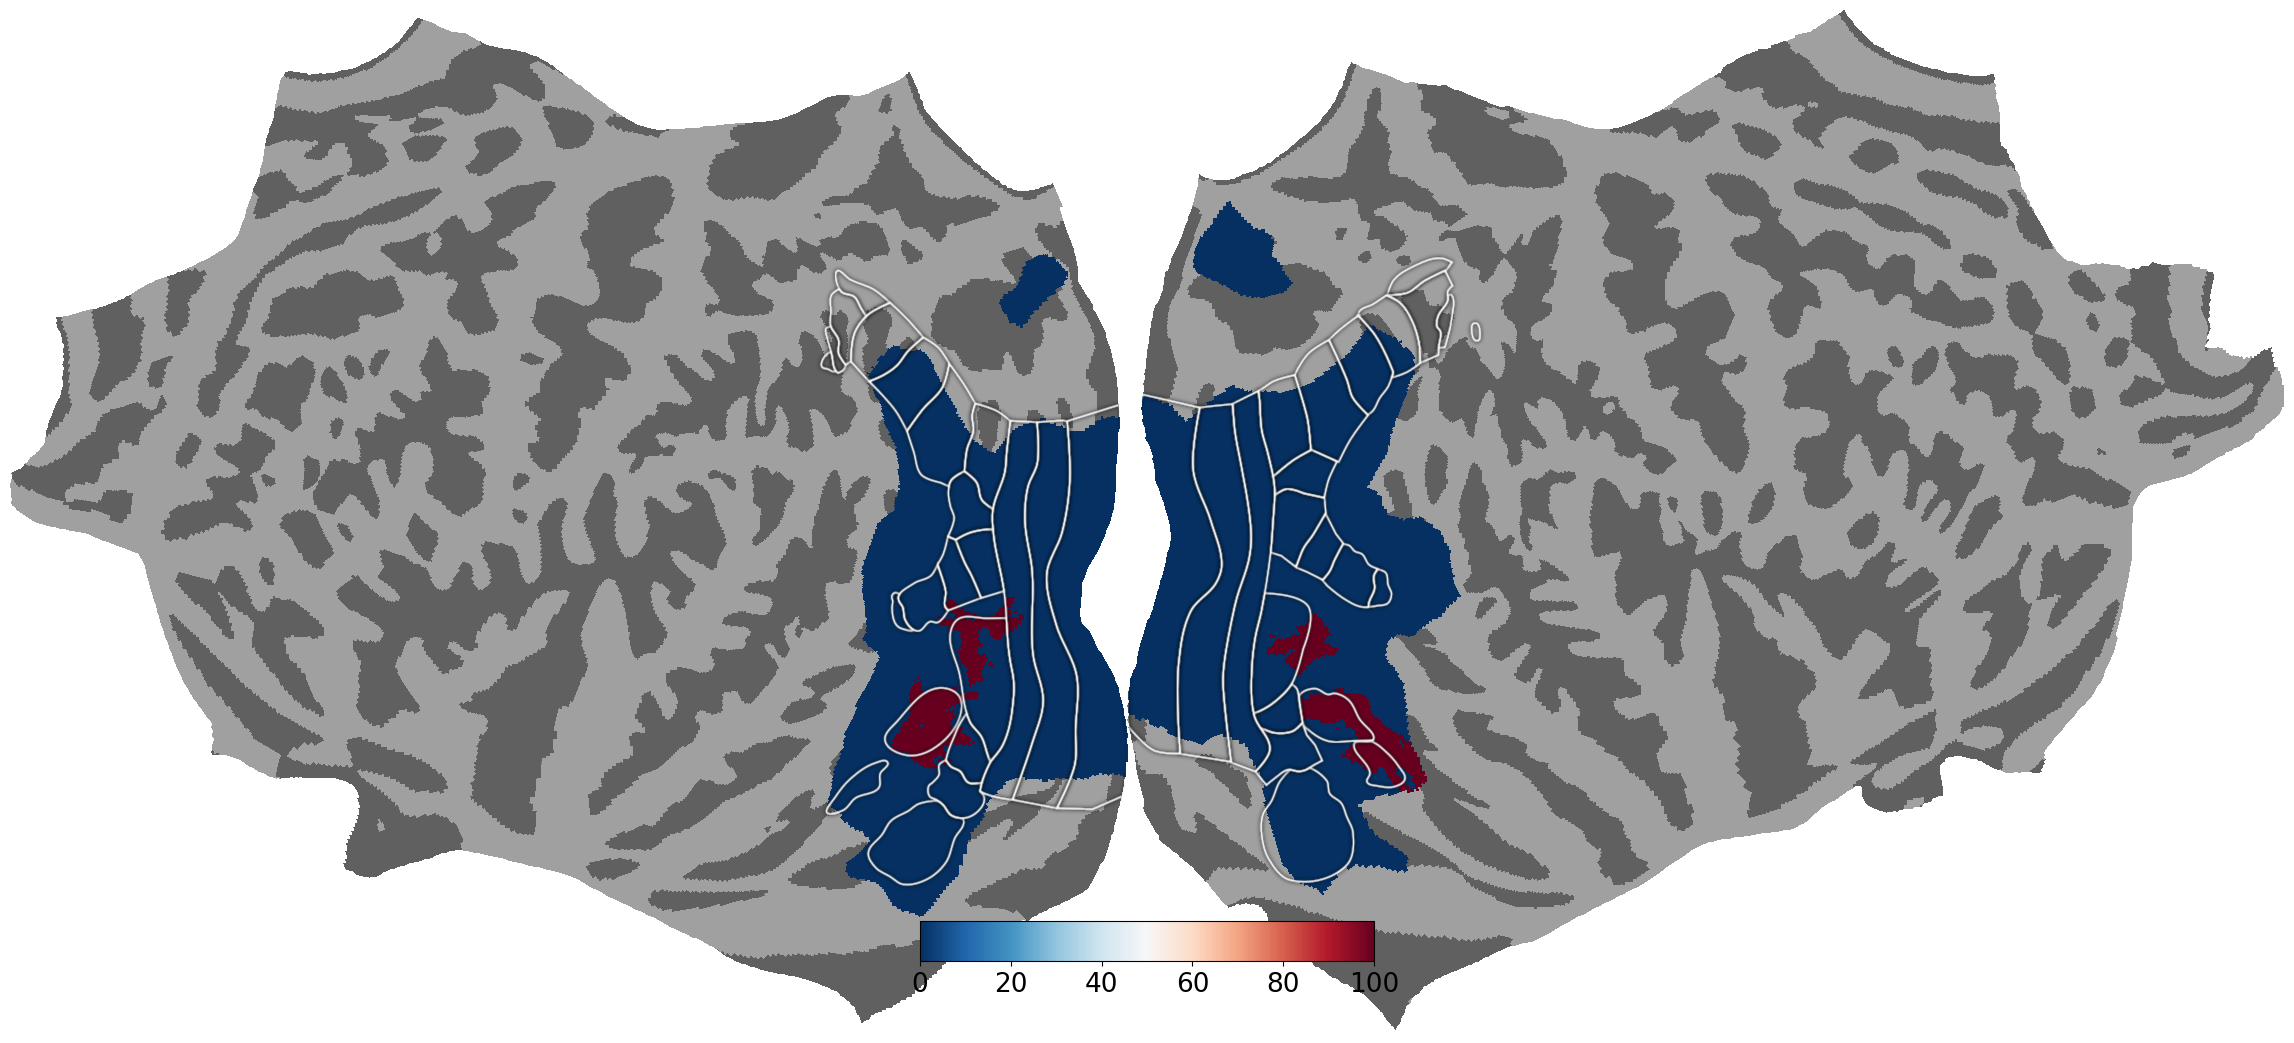

In [ ]:
# list of rois to maximize activations
rois_list = ['OFA', 'FFA-1', 'FFA-2']

lh_challenge_rois = []
rh_challenge_rois = []

for roi in rois_list:
    roi_ind = model.lh_roi_names.index(roi)
    lh_challenge_rois.append(model.lh_challenge_rois[roi_ind]) 
    rh_challenge_rois.append(model.rh_challenge_rois[roi_ind])

lh_challenge_rois = torch.clip(torch.stack(lh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()
rh_challenge_rois = torch.clip(torch.stack(rh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()

fig = plot_on_brain(lh_challenge_rois, rh_challenge_rois)

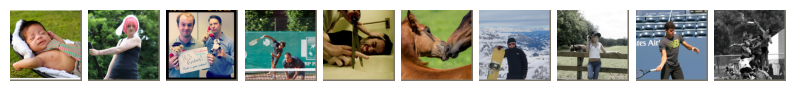

In [ ]:
mean = [0.485, 0.456, 0.406]  # Mean used for normalization
std = [0.229, 0.224, 0.225]  # Standard deviation used for normalization

def denormalize(tensor):
    """Denormalizes a tensor image."""
    # Create an inverse transform
    inv_normalize = transforms.Normalize(
        mean=[-m / s for m, s in zip(mean, std)],
        std=[1 / s for s in std]
    )

    # Convert the tensor to a PIL Image
    to_pil = transforms.ToPILImage()
    image = to_pil(inv_normalize(tensor))

    return image


rois_acts_inds = np.argsort(rois_acts)
# all_corrs = all_corrs[all_corrs_inds]

top_n = 10

fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 10)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i in range(0,top_n):
    img = images[rois_acts_inds[-(i+1)]]
    ax = plt.subplot(gs[i//10,i % 10])
    ax.imshow(denormalize(img))
    ax.axis("off")

plt.show()

In [ ]:
model = brain_encoder_wrapper(runs=np.arange(1, 11)) 

In [ ]:
model_features = model.attention(images)

dec_attn_weights = np.array(model_features['dec_attn_weights']).mean(0)


Run 1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 2


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 3


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 4


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 5


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 6


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 7


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 8


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 9


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 10


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


In [ ]:
dec_attn_weights.shape

(64, 50, 961)

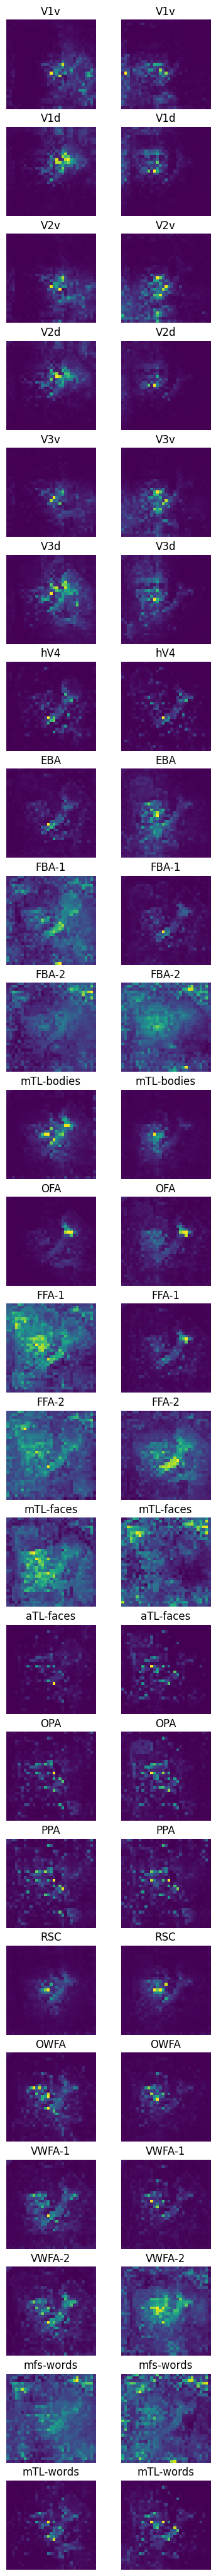

In [ ]:
h, w = 31, 31

dec_attn_weights = dec_attn_weights.reshape(-1,50,h, w)

#plt.imshow(dec_attn_weights[0][1])
im_ind = 6

fig = plt.figure(figsize= (4.5, (2.29*(model.lh_challenge_rois.shape[0]-1))))
# and we add one plot per reference point
gs = fig.add_gridspec(model.lh_challenge_rois.shape[0], 2)
fig.subplots_adjust(wspace=0.1, hspace=0.2)

for i in range(2):
    for j in range(1,len(model.lh_roi_names)+1):
        ax = plt.subplot(gs[j-1, i])
        ax.imshow(dec_attn_weights[im_ind][(i*25) + j])
        plt.axis('off')
        if i == 0:
            ax.set_title(model.lh_roi_names[j-1])
        elif i == 1:
            ax.set_title(model.rh_roi_names[j-1])
#fig.savefig("../figures/faces.png", bbox_inches='tight', dpi=300)

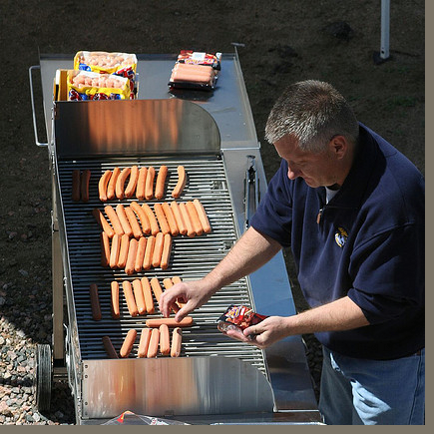

In [ ]:
import torch
import torchvision.transforms as transforms

mean = [0.485, 0.456, 0.406]  # Mean used for normalization
std = [0.229, 0.224, 0.225]  # Standard deviation used for normalization

def denormalize(tensor, mean, std):
    """Denormalizes a tensor image."""
    # Create an inverse transform
    inv_normalize = transforms.Normalize(
        mean=[-m / s for m, s in zip(mean, std)],
        std=[1 / s for s in std]
    )

    # Apply the inverse transform
    return inv_normalize(tensor)


# Denormalize the tensor
denormalized_tensor = denormalize(images[im_ind], mean, std)
# Convert the tensor to a PIL Image
to_pil = transforms.ToPILImage()
image = to_pil(denormalized_tensor)
image

In [ ]:
stop

torch.Size([1, 50, 961])

Optimization in pixel space 

In [ ]:
preprocess = torchvision.transforms.Compose([
            torchvision.transforms.Resize(256),
            torchvision.transforms.CenterCrop(224),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])
        ])


def logits_auction(logits):
  z_hat = logits - torch.max(logits, dim=2, keepdim=True)[0]
  # Step 2: Subtract the max value along the second dimension (width)
  z_hat = z_hat - torch.max(z_hat, dim=1, keepdim=True)[0]
  # Step 3: Compute the median along the second dimension (width)
  z_hat = torch.median(z_hat, dim=1)[0]

  return z_hat


# a general class for BLT models
class BLT_model(torch.nn.Module):
  def __init__(self,model_name,model_path,dataset,input_size=224):
    super().__init__()
    self.dataset=dataset
    self.input_size=input_size
    self.model_path=model_path
    self.model_name=model_name

    # get imagenet class names
    imagenet_dict_url='https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
    self.idx_to_class_name=eval(requests.get(imagenet_dict_url).text)
    self.class_name_to_idx={v: k for k, v in self.idx_to_class_name.items()}

  def load(self,device=None):

    # download model
    model, gap = load_model_path( self.model_path, print_model=False)
    self.add_module("net",model)
    if device is None:
      if torch.cuda.is_available():
        self.device=torch.device('cuda',0)
      else:
        self.device=torch.device('cpu')
    else:
      self.device=torch.device(device)
    self.net.to(self.device)
    self.net.eval() # important! move network to inference mode.
    print("loaded {} into {}.".format(self.model_name, str(self.device)))
  def forward(self,im):
    im=im.to(self.device)
    
    if im.ndim==3: # add a batch dimension, if it's not already there.
      im=im.unsqueeze(0)

    # apply differentiable resizing to bring the input image to the model's expected size
    #im=torch.nn.functional.interpolate(im,size=self.input_size,mode='bilinear',align_corners=True) # (interpolate expects NCHW inputs)

    # ! we do not normalize color channels here because robustness does that within its forward function.

    # evaluate model response to the preprocessed image
    logits=self.net(im)
    logits_tensor = torch.stack(logits, dim=0)
    #logits = logits_auction(logits_tensor.permute(1, 0, 2))
    logits = torch.median(logits_tensor, dim=0)[0]
    # logits = logits[2]
    probabilities=self.probabilities_from_logits(logits)
    return logits, probabilities

  def probabilities_from_logits(self,logits):
    return torch.nn.Softmax(dim=-1)(logits)

# subclasses for particular models
class BLT_robust(BLT_model):
    def __init__(self, model_name, model_path, dataset):
       self=super().__init__(model_name=model_name, model_path=model_path,dataset=dataset,input_size=224)


In [ ]:
def smooth_minimum(input,dim=-1,alpha=1.0):
  """ A smooth minimum based on inverted logsumexp with sharpness parameter alpha. alpha-->inf approaches hard minimum"""
  return -1/alpha*torch.logsumexp(-alpha*input,dim=dim) # https://en.wikipedia.org/wiki/LogSumExp

def adversariality_score(im,model_1,class_1_name,alpha=1.0,readout_type='logsoftmax',verbose=True):
  """ Evaluate the smooth and hard controversiality scores of an NCHWC image tensor according to two models and two classes

  Args:
    im (torch.Tensor): image tensor to evaluate (a 3d (chw) or 4d (nhcw)).
    model1, model2 (tuple): model objects, e.g., TVPretrainedModel, see above.
    class_1_name, class_2_name (str): Target classes. The controversiality score is high when model 1 detects class 1 (but not class 2) and model 2 detects class 2 (but not class 1).
    alpha (float): smooth controversiality score sharpness.
    readout_type (str): 'logits' for models with sigmoid readout, 'logsoftmax' for models with softmax readout.
    verbose (boolean): if True (default), shows image probabilities (averaged across images if a batch is provided).

  Returns:
    (tuple): tuple containing:
        smooth_controversiality_score (torch.Tensor): a smooth controversiality score (for optimization).
        hard_controversiality_score (torch.Tensor) (str): a hard score (for evaluation).
        info (dict): class probabilities.
  """

  # get class indecis (this relatively cumbersome implementation allows for models with mismatching class orders)
  m1_class1_ind=model_1.class_name_to_idx[class_1_name]
  model_1_logits,model_1_probabilities=model_1(im)


  #   print("logits moved to gpu:",time.perf_counter()-t0)
  if readout_type=='logits':
    input=torch.stack([model_1_logits[:,m1_class1_ind]],dim=-1)
  elif readout_type=='logsoftmax':
    # However, for softmax readout (unlike sigmoid readout), manipulating class-specific logits doesn't fully control output probabilities
    # (since all of the logits contribute to the resulting probabilities). Therefore, for softmax models, we target the logsoftmax scores.
    # This is essentially a smooth variant of Eq. 1 in Golan et al., 2020.
    logsoftmax=torch.nn.LogSoftmax(dim=-1)
    model_1_logsoftmax=logsoftmax(model_1_logits)
    input=torch.stack([model_1_logsoftmax[:,m1_class1_ind]],dim=-1)
  else:
     raise ValueError("readout_type must be logits or logsoftmax")

  smooth_adversariality_score = smooth_minimum(input,alpha=alpha,dim=-1)

  # A hard minimum of probabilities. The maximum score that can be achieved by this controversiality measure is 1.0.
  # This score is used for evaluating the controversiality of the resulting images once the optimization is done.
  input=torch.stack([model_1_probabilities[:,m1_class1_ind]],dim=-1)
  
  
  hard_adversariality_score, _ = torch.min(input,dim=-1)

  # save some class probabilities for display
  info={'p(class_1|model_1)':model_1_probabilities[:,m1_class1_ind]}

  return smooth_adversariality_score, hard_adversariality_score, info



#####################

def optimize_adversarial_stimuli(model_1,class_1,im_size=(4,3,256,256),
                                   pytorch_optimizer='Adam',optimizer_kwargs={'lr':5e-2,'betas':(0.9, 0.999),'weight_decay':0,'eps':1e-8},
                                   readout_type='logsoftmax',random_seed=0,
                                   max_steps=1000,max_consecutive_steps_without_pixel_change=10,
                                   return_PIL_images=True,verbose=True):
  """Optimize controversial stimuli with respect to two models and two classes.

  This function synthesizes controversial stimuli in pixel space such that model 1 detects class 1 (but not class 2) with high-confidence and model 2 detects class 2 (but not class 1) with high-confidence.

  Args:
  model_1, model2 (object): model objects, such as TVPretrainedModel (see above). Note that unlike standard torchvision model objects, we assume that the models receive unnormalized images.
  class_1, class_2 (str): target class names.
  im_size (tuple): Specify the optimized image tensor size as (N,C,H,W). If N is greater than 1, multiple images are optimized in parallel. Note that optimizing batches might result in different convergence-based stopping compared to optimizing one image at a time.
  pytorch_optimizer (str or class): either the name of a torch.optim class or an optimizer class.
  optimizer_kwargs (dict): keywords passed to the optimizer
  readout_type (str): 'logits' for models with sigmoid readout, 'logsoftmax' for models with softmax readout.
  random_seed (int): sets the random seed for PyTorch.
  max_steps (int): maximal number of optimization steps
  max_consecutive_steps_without_pixel_change (int): if the image hasn't changed for this number of steps, stop
  return_PIL_images (boolean): if True (default), return also a list of PIL images.
  verbose (boolean): if True (default), shows image probabilities (averaged across images if a batch is provided) and other diagnostic messages.

  Returns:
  (tuple): tuple containing:
    im_tensor (torch.Tensor): Controversial stimuli image tensor in nchw format.
    PIL_controversial_stimuli (list): Controversial stimuli as list of PIL.Image images.
    hard_controversiality_score: (list): Controversiality score for each image as float.
  or (if return_PIL_images == False):
    im_tensor (torch.Tensor): Controversial stimuli image tensor in nchw format.
    hard_controversiality_score: (list): Controversiality score for each image as float.
  """

  verboseprint = print if verbose else lambda *a, **k: None # https://stackoverflow.com/a/5980173

  # used for display:
  short_class_1_name=class_1.split(',',1)[0]
  BOLD=colored.attr('bold')
  normal=colored.attr('reset')

  # define initial image(s)
  torch.manual_seed(random_seed)
  np.random.seed(random_seed)

  initial_im=torch.rand(im_size) # a standard float NHWC image (intensity in [0,1]). The magnitude of the noise can be reduced.

  # To smoothly enforce intensity limit constraints (i.e., keep the optimized image pixel intensities in [0,1]),
  # we use a constraining through parameterization approach. The optimized variable (z) is an image of unbounded intensity values ((-inf,+inf)).
  # It is squeezed to the [0,1] range by a sigmoid before being fed to the model.

  # First, we use the *inverse sigmoid* to stretch the initial image:
  inverse_sigmoid=lambda p : torch.log(p/(1-p))
  z=inverse_sigmoid(initial_im)
  z.requires_grad=True

  # initialize image optimizer
  if isinstance(pytorch_optimizer, str):
    OptimClass=getattr(torch.optim,pytorch_optimizer)
  else:
    OptimClass=pytorch_optimizer
  optimizer = OptimClass(params=[z], **optimizer_kwargs)

  previous_im=None

  alpha=100.0

  converged=False
  consecutive_steps_without_pixel_change=0

  for i_step in trange(max_steps):

    optimizer.zero_grad()
    x=torch.sigmoid(z) # compress z back to [0,1] so it's a real image.
    smooth_adversariality_score, hard_adversariality_score, info=adversariality_score(
        x,model_1,class_1,alpha=alpha,
        readout_type=readout_type,verbose=verbose)

    loss=-smooth_adversariality_score # we would like to MAXIMIZE controversiality, therefore the minus.
    loss=loss.sum() # when multiple stimuli are optimized, make the loss scalar by summation
    loss.backward()
    optimizer.step()

    # verboseprint('{}: {} {:>7.2%}, {} {:>7.2%} │ {}: {} {:>7.2%}, {} {:>7.2%} │ {}:loss={:3.2e}'.format(
    #       BOLD+model_1.model_name+normal,short_class_1_name,info['p(class_1|model_1)'].mean(),short_class_2_name,info['p(class_2|model_1)'].mean(),
    #       BOLD+model_2.model_name+normal,short_class_1_name,info['p(class_1|model_2)'].mean(),short_class_2_name,info['p(class_2|model_2)'].mean(),
    #       i_step,loss.item()))

    # monitor the magnitude of image change.
    if previous_im is not None:
        abs_change=(x-previous_im).abs()*255.0 # change on a 0-255 intesity scale
        max_abs_change=abs_change.max().item()
        if (max_abs_change)<0.5: # check if the maximal absolute change across pixels is less than half an intesity level.
          consecutive_steps_without_pixel_change+=1
          if consecutive_steps_without_pixel_change>max_consecutive_steps_without_pixel_change:
            converged=True
            break
        else:
          consecutive_steps_without_pixel_change=0

    previous_im=x.detach().clone()

  if converged:
    verboseprint('converged (n_steps={})'.format(i_step+1))
  else:
    verboseprint('max steps achieved (n_steps={})'.format(i_step+1))

  # Quantize intesity. Since we plan to show these images to humans, we don't want to take into account intensity levels that cannot be displayed.
  x=(x.detach()*255.0).round()/255.0

  # Evaluate final controversiality score, using the quantized image.
  _,hard_adversariality_score,_=adversariality_score(x,model_1,class_1,verbose=False)
  hard_adversariality_score=hard_adversariality_score.detach().cpu().numpy().tolist() # convert a vector tensor to list of floats

  verboseprint('controversiality score: '+', '.join('{:0.2f}'.format(f) for f in hard_adversariality_score))

  if return_PIL_images:
    numpy_controversial_stimuli=x.detach().cpu().numpy().transpose([0,2,3,1]) # NCHW -> NHWC
    numpy_controversial_stimuli=(numpy_controversial_stimuli*255.0).astype(np.uint8)
    PIL_adversariality_stimuli=[]
    for i in range(len(numpy_controversial_stimuli)):
      PIL_adversariality_stimuli.append(Image.fromarray(numpy_controversial_stimuli[i]))
    return x.detach(), PIL_adversariality_stimuli, hard_adversariality_score
  else:
    return x.detach(), hard_adversariality_score

In [ ]:
torch_controversial_stimulus, PIL_controversial_stimuli, score = optimize_adversarial_stimuli(blt_bl,class_1='Persian cat',readout_type='logits', max_steps=1000)